# Notes_SVR

### How it's work?

- In the SVR unlike Linear Regression you will have a tube, with a width $\epsilon$.

- The tube is called as the $\epsilon$-Insensitive Tube, which means any point inside the tube is acceptable. 

- $\epsilon$ is the buffer.

- The distance between the points(outside tube) and the tube is **Residual** here.

- And we want to reduce the sum of Squared Residuals.

<img src = "SVR_Intuition.PNG">

### Why it's called support vector ?
- Each point can be represented as a vector and the Structure of the Tube is defined by these vectors. 
- At a glacse it looks like the Vectors are suppoting this structure hence Support vector.


### What re kernels?
- SVM algorithms use a set of mathematical functions that are defined as the kernel. 
- The function of kernel is to take data as input and transform it into the required form. Different SVM algorithms use different types of kernel functions. These functions can be different types. For example linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid.

### Kernel Rules
Define kernel function as follows:
<img src="kernal-rule.png" width=200>

### Kernel used by SVR.
## $$Gaussian~kernel K(\bar x, \bar l^i)  = exp\left( {- \frac{\|\bar x - \bar l^i \|^2}{2\sigma ^2}} \right)$$

Examples of kernels:
#### 1. Polynomial kernel
It is popular in image processing.
$$K(X_i, X_j) = (X_i \times X_j + 1)^d$$
where d is the degree of the polynomial.


#### 2. Gaussian kernel

It is a general-purpose kernel; used when there is no prior knowledge about the data. Equation is:
## $$Gaussian~kernel ~K(\bar X, \bar y)  = exp\left( {- \frac{\|\bar X - \bar y \|^2}{2\sigma ^2}} \right)$$

where $l^i$ is the location of centroid.


#### 3.  Gaussian radial basis function (RBF)
It is a general-purpose kernel; used when there is no prior knowledge about the data.
## $$K(X_i, X_j) = exp(-\lambda \| X_i \times X_j\|^2 )$$



# Python Implementation

In [1]:
## Importing the Dataset

import pandas as pd 
dataset = pd.read_csv("Position_Salaries.csv")
# dataset.head()
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling:

Here Feature scaling is required Because.
In SVR There is **No explicite Equation** of Dependent variable WRT the Dependent Variables. 

$\Rightarrow$ Hence **No Coefficients** to multiply features.

$\Rightarrow$ Hence **No Compensation** to the higher values of features.

In SVR there is an **Implicite Equation** of Dependent Variable WRT Features and $\Rightarrow$ hence **No compensating coefficients** $\Rightarrow$ Hence we **Need Feature Scaling**.

# Python Implementation

## Data preprocessing

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("Position_Salaries.csv")
print("Dataset:\n", data.head())

Dataset:
             Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [3]:
x = data.iloc[:, 1:2].values
y = data.iloc[:, -1].values
print("x:\n", x)
print("\ny:\n", y)

x:
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

y:
 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Missing values

In [4]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

## categorical data
the categorical dta is already been takes care of by the 'Level' column.

### Now the StandardScaler class expects the data to be in 2D array form hence we need to transform y.

In [6]:
y = y.reshape(-1,1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
scaled_x = sc_x.fit_transform(x)
print("scaled_x:\n",scaled_x)

scaled_x:
 [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
sc_y = StandardScaler()
scaled_y = sc_y.fit_transform(y)
print("scaled_y:\n",scaled_y)

scaled_y:
 [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Create and train the model.

In [11]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')

In [13]:
svr.fit(scaled_x, scaled_y)

C:\Users\akash\.conda\envs\General\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predicting the salary for level 6.5
the things we need to take care.
1. We have traine dto SVR model on scaled data hence we need to predict on the scaled data.
2. the prediction will give a scaled values as a result, so we have to reverse the scaling to seethe actual value.

In [19]:
pred = sc_y.inverse_transform(svr.predict(sc_x.transform([[6.5]])))
print("pred:",pred)

pred: [170370.0204065]


# Visualizing the SVR results

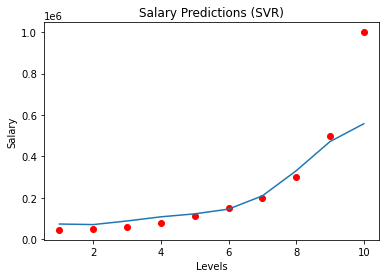

In [23]:
from matplotlib import pyplot as plt
plt.scatter(x, y, color='red')
plt.plot(x, sc_y.inverse_transform(svr.predict(scaled_x)))
plt.title("Salary Predictions (SVR)")
plt.xlabel("Levels")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

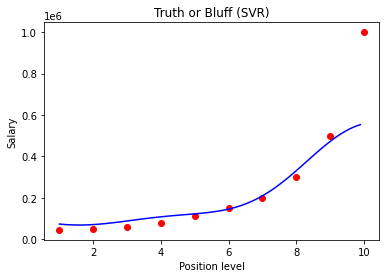

In [25]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(x, y, color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(svr.predict(sc_x.transform(x_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()